# Notebook for comparison beween Non-linear Gevolution and class and agreement between class and hi-class

In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.interpolate import interp1d
from pylab import rcParams
import scipy.integrate as integrate
import h5py
from readgadget import *
from pygadgetreader import *
ColorsI = ["red","blue","green","purple","darkcyan","gold","maroon","black","darkslategrey",
           "darkgreen","navy","indigo","magenta","salmon","dodgerblue","springgreen","plum",
           "cyan","khaki","lightcoral","gray"]
ColorsII = []

NUM_COLORS = 20
from matplotlib.colors import LogNorm

cm = plt.get_cmap('gist_rainbow')
# plt.style.use('seaborn-paper')
plt.rcParams['font.serif'] = 'Ubuntu'
from matplotlib import colors, ticker, cm
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [2]:
kess_nl=[]
kess_nl_source=[]

# When the scalar field is coupled to other components.
kess_nl_source.append(np.loadtxt('./../Analysis_Data_3D/Simulations_CSCS/Runs_27Jan_2020/cs2_e7//space_resolution/cs2_e7_Ngrid_16_dtau_04///output/snapshots.txt'))
kess_nl_source.append(np.loadtxt('./../Analysis_Data_3D/Simulations_CSCS/Runs_27Jan_2020/cs2_e7/space_resolution/cs2_e7_Ngrid_32_dtau_04/output/snapshots.txt'))
kess_nl_source.append(np.loadtxt('./../Analysis_Data_3D/Simulations_CSCS/Runs_27Jan_2020/cs2_e7/time_resolution/cs2_e7_Ngrid_64_dtau_04//output/snapshots.txt'))
kess_nl_source.append(np.loadtxt('./../Analysis_Data_3D/Simulations_CSCS/Runs_27Jan_2020/cs2_e7/space_resolution/cs2_e7_Ngrid_128_dtau_04///output/snapshots.txt'))
kess_nl_source.append(np.loadtxt('./../Analysis_Data_3D/Simulations_CSCS/Runs_4Feb_2020_soundspeed_1024Ngrid/Files_Baobab_blowup_CSCS_4Feb2020_SoundSpeed_1024Ngrid/full_equation/cs2_e7_Ngrid_1024_dtau_04_full///output/snapshots.txt'))
kess_nl_source.append(np.loadtxt('./../Analysis_Data_3D/Simulations_CSCS/CSCS_Blowup_runs_18Feb2020/Blowup_runs_data_18Feb2020/cs2_e7_Ngrid_2048_dtau_04_full////output/snapshots.txt'))

# When field is solved independently
kess_nl.append(np.loadtxt('./../Analysis_Data_3D/Simulations_CSCS/Runs_27Jan_2020/cs2_e7/solo_kess_eq/non_linear/cs2_e7_Ngrid_16_dtau_04///output/snapshots.txt'))
kess_nl.append(np.loadtxt('./../Analysis_Data_3D/Simulations_CSCS/Runs_27Jan_2020/cs2_e7/solo_kess_eq/non_linear/cs2_e7_Ngrid_32_dtau_04////output/snapshots.txt'))
kess_nl.append(np.loadtxt('./../Analysis_Data_3D/Simulations_CSCS/Runs_27Jan_2020/cs2_e7/solo_kess_eq/non_linear/cs2_e7_Ngrid_64_dtau_04////output/snapshots.txt'))
kess_nl.append(np.loadtxt('./../Analysis_Data_3D/Simulations_CSCS/Runs_27Jan_2020/cs2_e7/solo_kess_eq/non_linear/cs2_e7_Ngrid_128_dtau_04////output/snapshots.txt'))
kess_nl.append(np.loadtxt('./../Analysis_Data_3D/Simulations_CSCS/Runs_4Feb_2020_soundspeed_1024Ngrid/Files_Baobab_blowup_CSCS_4Feb2020_SoundSpeed_1024Ngrid/solo_equation/cs2_e7_Ngrid_1024_dtau_04_solo////output/snapshots.txt'))
kess_nl.append(np.loadtxt('./../Analysis_Data_3D/Simulations_CSCS/CSCS_11Feb2020/Baobab_Blowup_Newfiles_12Feb2020/Runs_series1_Highresolution/cs2_e7_Ngrid_2048_dtau_04_solo/////output/snapshots.txt'))
kess_nl.append(np.loadtxt('./../Analysis_Data_3D/Simulations_CSCS/CSCS_11Feb2020/Baobab_Blowup_Newfiles_12Feb2020/Runs_series1_Highresolution/cs2_e7_Ngrid_3600_dtau_04_solo///////output/snapshots.txt'))




# Ngrid vs z_b

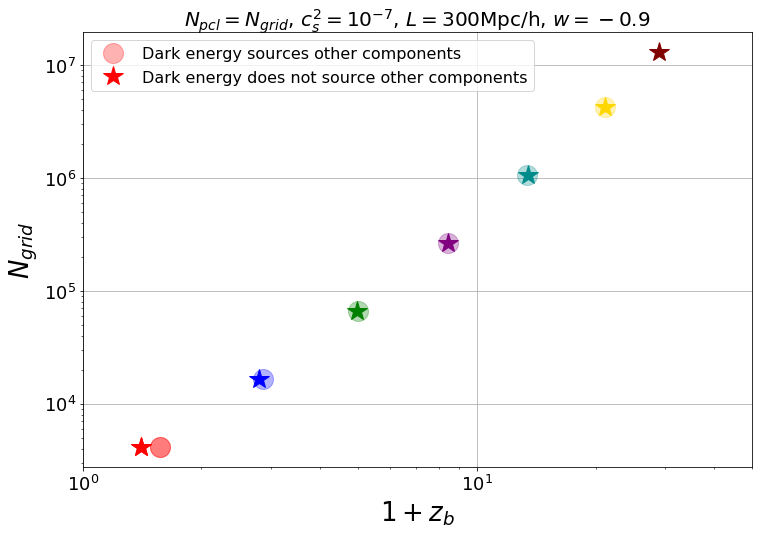

In [13]:
# data= [r"$64^3$",r"$128^3$",r"$256^3$",r"$512^3$",r"$1024^3$"]
# Ngrid_solo = [64**3,128**3,256**3,512**3,1024**3,2048**3]
# Ngrid_full = [64**3,128**3,256**3,512**3,1024**3]
Ngrid_solo = [64**3,128**3,256**3,512**3,1024**3,2048**3,3600**3]
Ngrid_full = [64**3,128**3,256**3,512**3,1024**3,2048**3]
plt.figure(figsize=(12,8))

for i in range(6):
    if (i==0):
        plt.plot(1./(kess_nl_source[i][-1:,2]) ,Ngrid_full[i]**(2./3),"o",markersize=20,alpha =0.3,color=ColorsI[i],label = "Dark energy sources other components")

#     plt.semilogy(1./(kess_nl[i][:,2]) -1.,np.abs(kess_nl[i][:,3]),"o",lw=3,color=ColorsI[i],label=r""+data[i])
    plt.plot(1./(kess_nl_source[i][-1:,2]) ,Ngrid_full[i]**(2./3),"o",markersize=20,alpha =0.3,color=ColorsI[i])
for i in range(7):
    if (i==0):
        plt.plot(1./(kess_nl[i][-1:,2]) ,Ngrid_solo[i]**(2./3),"*",markersize=20,alpha =1,color=ColorsI[i],label = "Dark energy does not source other components")
#     plt.semilogy(1./(kess_nl[i][:,2]) -1.,np.abs(kess_nl[i][:,3]),"o",lw=3,color=ColorsI[i],label=r""+data[i])
    plt.plot(1./(kess_nl[i][-1:,2]) ,Ngrid_solo[i]**(2./3),"*",markersize=20,alpha =1,color=ColorsI[i])

#     plt.legend()
# #     plt.ylim(1.e-8,1.e-2)
plt.xlabel("$1 + z_b$",fontsize=26)
plt.title(r"$N_{pcl} = N_{grid}$, $c_s^2=10^{-7}$, $L = 300$Mpc/h, $w=-0.9$", fontsize=20)
plt.ylabel(r"$N_{grid}$",fontsize=26)
# plt.ylim(1.e-15,1.e-1)
plt.grid(True)
plt.yscale('log')
plt.xscale('log')

plt.legend(fontsize=16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.tick_params(axis = 'both', which = 'minor', labelsize = 18)
# plt.savefig("spatial_resolution_v1.pdf")
plt.xlim(1,50)
plt.show()

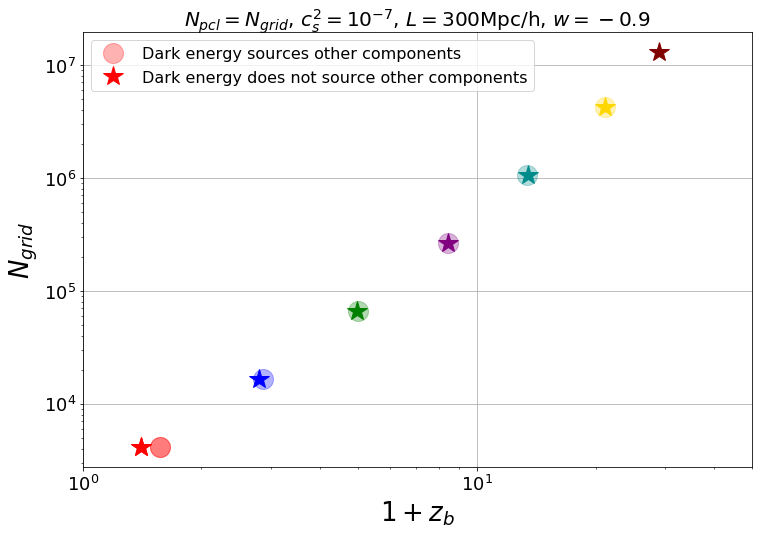

In [11]:
# data= [r"$64^3$",r"$128^3$",r"$256^3$",r"$512^3$",r"$1024^3$"]
# Ngrid_solo = [64**3,128**3,256**3,512**3,1024**3,2048**3]
# Ngrid_full = [64**3,128**3,256**3,512**3,1024**3]
Ngrid_solo = [64**3,128**3,256**3,512**3,1024**3,2048**3,3600**3]
Ngrid_full = [64**3,128**3,256**3,512**3,1024**3,2048**3]
plt.figure(figsize=(12,8))

for i in range(6):
    if (i==0):
        plt.plot(1./(kess_nl_source[i][-1:,2]) ,Ngrid_full[i]**(2./3),"o",markersize=20,alpha =0.3,color=ColorsI[i],label = "Dark energy sources other components")

#     plt.semilogy(1./(kess_nl[i][:,2]) -1.,np.abs(kess_nl[i][:,3]),"o",lw=3,color=ColorsI[i],label=r""+data[i])
    plt.plot(1./(kess_nl_source[i][-1:,2]) ,Ngrid_full[i]**(2./3),"o",markersize=20,alpha =0.3,color=ColorsI[i])
for i in range(7):
    if (i==0):
        plt.plot(1./(kess_nl[i][-1:,2]) ,Ngrid_solo[i]**(2./3),"*",markersize=20,alpha =1,color=ColorsI[i],label = "Dark energy does not source other components")
#     plt.semilogy(1./(kess_nl[i][:,2]) -1.,np.abs(kess_nl[i][:,3]),"o",lw=3,color=ColorsI[i],label=r""+data[i])
    plt.plot(1./(kess_nl[i][-1:,2]) ,Ngrid_solo[i]**(2./3),"*",markersize=20,alpha =1,color=ColorsI[i])

#     plt.legend()
# #     plt.ylim(1.e-8,1.e-2)
plt.xlabel("$1 + z_b$",fontsize=26)
plt.title(r"$N_{pcl} = N_{grid}$, $c_s^2=10^{-7}$, $L = 300$Mpc/h, $w=-0.9$", fontsize=20)
plt.ylabel(r"$N_{grid}$",fontsize=26)
# plt.ylim(1.e-15,1.e-1)
plt.grid(True)
plt.yscale('log')
plt.xscale('log')

plt.legend(fontsize=16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.tick_params(axis = 'both', which = 'minor', labelsize = 18)
# plt.savefig("spatial_resolution_v1.pdf")
plt.xlim(1,50)
plt.show()

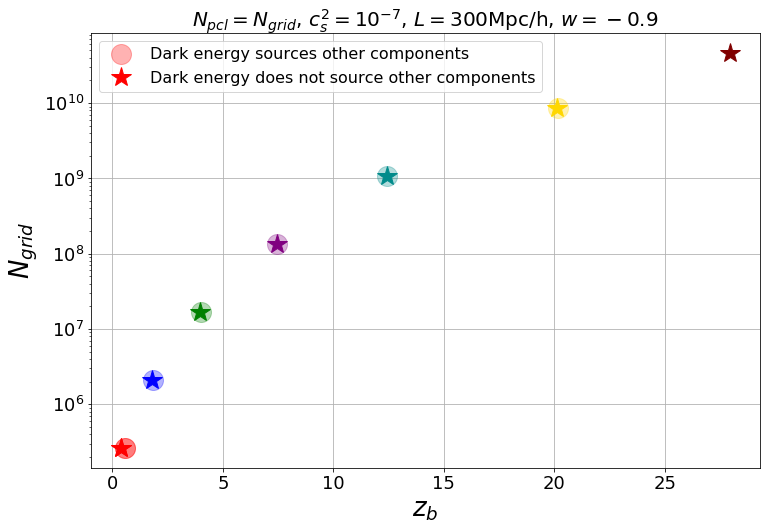

In [4]:
# data= [r"$64^3$",r"$128^3$",r"$256^3$",r"$512^3$",r"$1024^3$"]
# Ngrid_solo = [64**3,128**3,256**3,512**3,1024**3,2048**3]
# Ngrid_full = [64**3,128**3,256**3,512**3,1024**3]
Ngrid_solo = [64**3,128**3,256**3,512**3,1024**3,2048**3,3600**3]
Ngrid_full = [64**3,128**3,256**3,512**3,1024**3,2048**3]
plt.figure(figsize=(12,8))

for i in range(6):
    if (i==0):
        plt.semilogy(1./(kess_nl_source[i][-1:,2])-1 ,Ngrid_full[i],"o",markersize=20,alpha =0.3,color=ColorsI[i],label = "Dark energy sources other components")

#     plt.semilogy(1./(kess_nl[i][:,2]) -1.,np.abs(kess_nl[i][:,3]),"o",lw=3,color=ColorsI[i],label=r""+data[i])
    plt.semilogy(1./(kess_nl_source[i][-1:,2])-1 ,Ngrid_full[i],"o",markersize=20,alpha =0.3,color=ColorsI[i])
for i in range(7):
    if (i==0):
        plt.semilogy(1./(kess_nl[i][-1:,2])-1 ,Ngrid_solo[i],"*",markersize=20,alpha =1,color=ColorsI[i],label = "Dark energy does not source other components")
#     plt.semilogy(1./(kess_nl[i][:,2]) -1.,np.abs(kess_nl[i][:,3]),"o",lw=3,color=ColorsI[i],label=r""+data[i])
    plt.semilogy(1./(kess_nl[i][-1:,2])-1 ,Ngrid_solo[i],"*",markersize=20,alpha =1,color=ColorsI[i])

#     plt.legend()
# #     plt.ylim(1.e-8,1.e-2)
plt.xlabel("$z_b$",fontsize=26)
plt.title(r"$N_{pcl} = N_{grid}$, $c_s^2=10^{-7}$, $L = 300$Mpc/h, $w=-0.9$", fontsize=20)
plt.ylabel(r"$N_{grid}$",fontsize=26)
# plt.ylim(1.e-15,1.e-1)
plt.grid(True)

plt.legend(fontsize=16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.tick_params(axis = 'both', which = 'minor', labelsize = 18)
# plt.savefig("spatial_resolution_v1.pdf")

plt.show()

/Users/farbod/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/Users/farbod/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


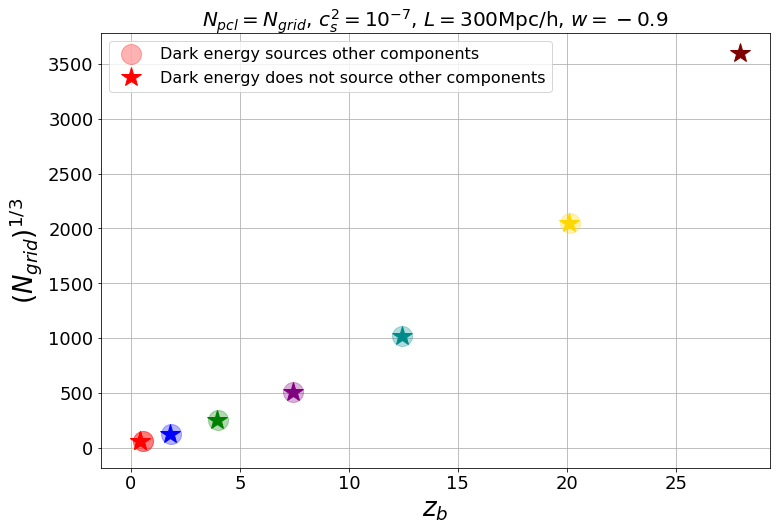

In [5]:
# data= [r"$64^3$",r"$128^3$",r"$256^3$",r"$512^3$",r"$1024^3$"]
# Ngrid_solo = [64**3,128**3,256**3,512**3,1024**3,2048**3]
# Ngrid_full = [64**3,128**3,256**3,512**3,1024**3]
Ngrid_solo = [64,128,256,512,1024,2048,3600]
Ngrid_full = [64,128,256,512,1024,2048]
plt.figure(figsize=(12,8))
Ngrid = np.arange(0,30)
const = 1./8;
for i in range(6):
    if (i==0):
        plt.plot(1./(kess_nl_source[i][-1:,2])-1 ,Ngrid_full[i],"o",markersize=20,alpha =0.3,color=ColorsI[i],label = "Dark energy sources other components")

#     plt.semilogy(1./(kess_nl[i][:,2]) -1.,np.abs(kess_nl[i][:,3]),"o",lw=3,color=ColorsI[i],label=r""+data[i])
    plt.plot(1./(kess_nl_source[i][-1:,2])-1 ,Ngrid_full[i],"o",markersize=20,alpha =0.3,color=ColorsI[i])
plt.plot(const * np.sqrt(2.0 * np.log(Ngrid)) ,Ngrid,"--",markersize=20,alpha =0.3,color=ColorsI[i]) # 1 + z = 1/8 sigma_R \sqrt{2 ln Ngrid}

for i in range(7):
    if (i==0):
        plt.plot(1./(kess_nl[i][-1:,2])-1 ,Ngrid_solo[i],"*",markersize=20,alpha =1,color=ColorsI[i],label = "Dark energy does not source other components")
#     plt.semilogy(1./(kess_nl[i][:,2]) -1.,np.abs(kess_nl[i][:,3]),"o",lw=3,color=ColorsI[i],label=r""+data[i])
    plt.plot(1./(kess_nl[i][-1:,2])-1 ,Ngrid_solo[i],"*",markersize=20,alpha =1,color=ColorsI[i])
#     plt.legend()
# #     plt.ylim(1.e-8,1.e-2)

plt.xlabel("$z_b$",fontsize=26)
plt.title(r"$N_{pcl} = N_{grid}$, $c_s^2=10^{-7}$, $L = 300$Mpc/h, $w=-0.9$", fontsize=20)
plt.ylabel(r"$({N_{grid}})^{1/3}$",fontsize=26)
# plt.ylim(1.e-15,1.e-1)
# plt.yticks([64,128,256])

plt.legend(fontsize=16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.tick_params(axis = 'both', which = 'minor', labelsize = 18)
plt.grid(True)

# plt.savefig("spatial_resolution_v2.pdf")

plt.show()

/Users/farbod/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/Users/farbod/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


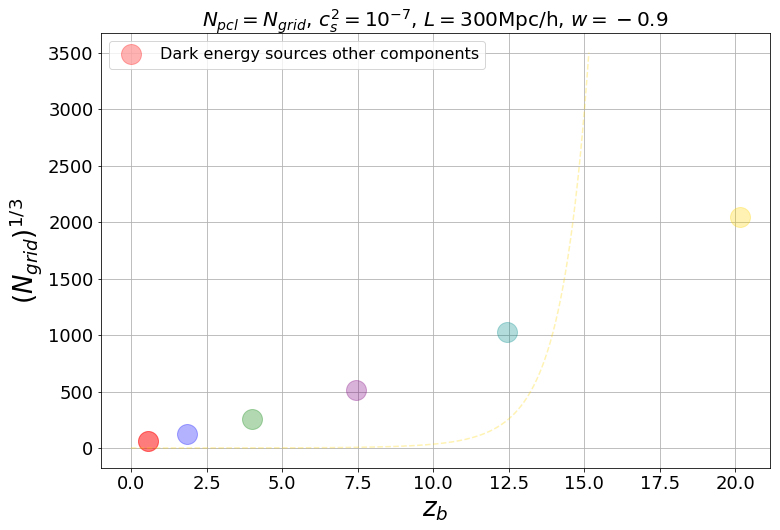

In [16]:
# data= [r"$64^3$",r"$128^3$",r"$256^3$",r"$512^3$",r"$1024^3$"]
# Ngrid_solo = [64**3,128**3,256**3,512**3,1024**3,2048**3]
# Ngrid_full = [64**3,128**3,256**3,512**3,1024**3]
Ngrid_solo = [64,128,256,512,1024,2048,3600]
Ngrid_full = [64,128,256,512,1024,2048]
plt.figure(figsize=(12,8))
Ngrid = np.arange(0,3500)
const = 30./8;
for i in range(6):
    if (i==0):
        plt.plot(1./(kess_nl_source[i][-1:,2])-1 ,Ngrid_full[i],"o",markersize=20,alpha =0.3,color=ColorsI[i],label = "Dark energy sources other components")

#     plt.semilogy(1./(kess_nl[i][:,2]) -1.,np.abs(kess_nl[i][:,3]),"o",lw=3,color=ColorsI[i],label=r""+data[i])
    plt.plot(1./(kess_nl_source[i][-1:,2])-1 ,Ngrid_full[i],"o",markersize=20,alpha =0.3,color=ColorsI[i])
plt.plot((const/Ngrid**(1/3)) * np.sqrt(2.0 * np.log(Ngrid)) ,Ngrid,"--",markersize=20,alpha =0.3,color=ColorsI[i]) # 1 + z = 1/8 sigma_R \sqrt{2 ln Ngrid}

# for i in range(7):
#     if (i==0):
#         plt.plot(1./(kess_nl[i][-1:,2])-1 ,Ngrid_solo[i],"*",markersize=20,alpha =1,color=ColorsI[i],label = "Dark energy does not source other components")
# #     plt.semilogy(1./(kess_nl[i][:,2]) -1.,np.abs(kess_nl[i][:,3]),"o",lw=3,color=ColorsI[i],label=r""+data[i])
#     plt.plot(1./(kess_nl[i][-1:,2])-1 ,Ngrid_solo[i],"*",markersize=20,alpha =1,color=ColorsI[i])
# #     plt.legend()
# # #     plt.ylim(1.e-8,1.e-2)

plt.xlabel("$z_b$",fontsize=26)
plt.title(r"$N_{pcl} = N_{grid}$, $c_s^2=10^{-7}$, $L = 300$Mpc/h, $w=-0.9$", fontsize=20)
plt.ylabel(r"$({N_{grid}})^{1/3}$",fontsize=26)
# plt.ylim(1.e-15,1.e-1)
# plt.yticks([64,128,256])

plt.legend(fontsize=16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.tick_params(axis = 'both', which = 'minor', labelsize = 18)
plt.grid(True)

# plt.savefig("spatial_resolution_v2.pdf")

plt.show()

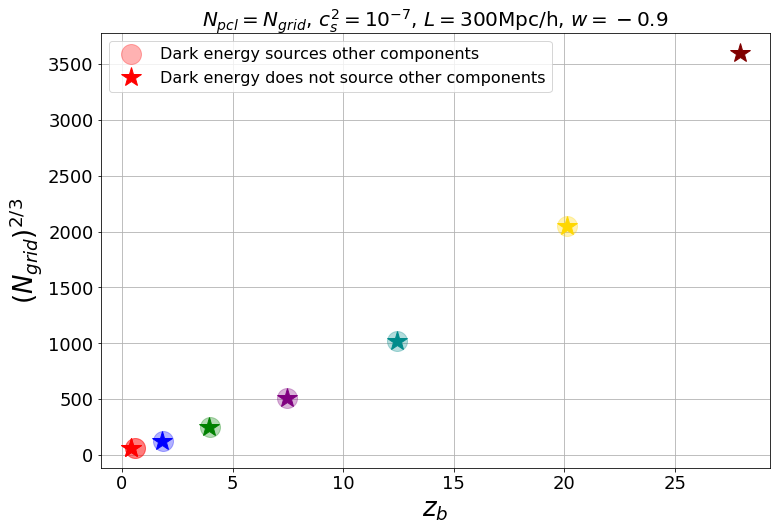

In [7]:
# data= [r"$64^3$",r"$128^3$",r"$256^3$",r"$512^3$",r"$1024^3$"]
# Ngrid_solo = [64**3,128**3,256**3,512**3,1024**3,2048**3]
# Ngrid_full = [64**3,128**3,256**3,512**3,1024**3]
Ngrid_solo = [64,128,256,512,1024,2048,3600]
Ngrid_full = [64,128,256,512,1024,2048]
plt.figure(figsize=(12,8))

mm=1
for i in range(6):
    if (i==0):
        plt.plot(1./(kess_nl_source[i][-1:,2])-1 ,Ngrid_full[i]**(mm),"o",markersize=20,alpha =0.3,color=ColorsI[i],label = "Dark energy sources other components")

#     plt.semilogy(1./(kess_nl[i][:,2]) -1.,np.abs(kess_nl[i][:,3]),"o",lw=3,color=ColorsI[i],label=r""+data[i])
    plt.plot(1./(kess_nl_source[i][-1:,2])-1 ,Ngrid_full[i]**(mm),"o",markersize=20,alpha =0.3,color=ColorsI[i])
for i in range(7):
    if (i==0):
        plt.plot(1./(kess_nl[i][-1:,2])-1 ,Ngrid_solo[i]**(mm),"*",markersize=20,alpha =1,color=ColorsI[i],label = "Dark energy does not source other components")
#     plt.semilogy(1./(kess_nl[i][:,2]) -1.,np.abs(kess_nl[i][:,3]),"o",lw=3,color=ColorsI[i],label=r""+data[i])
    plt.plot(1./(kess_nl[i][-1:,2])-1 ,Ngrid_solo[i]**(mm),"*",markersize=20,alpha =1,color=ColorsI[i])
#     plt.legend()
# z = np.arange(0,30,0.1)
# plt.plot (z, z**2 * best_vals[0] + best_vals[1] * z +  best_vals[2])
# #     plt.ylim(1.e-8,1.e-2)
plt.xlabel("$z_b$",fontsize=26)
plt.title(r"$N_{pcl} = N_{grid}$, $c_s^2=10^{-7}$, $L = 300$Mpc/h, $w=-0.9$", fontsize=20)
plt.ylabel(r"$({N_{grid}})^{2/3}$",fontsize=26)
# plt.ylim(1.e-15,1.e-1)
# plt.yticks([64,128,256])

plt.legend(fontsize=16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.tick_params(axis = 'both', which = 'minor', labelsize = 18)
plt.grid(True)

# plt.savefig("spatial_resolution_v3.pdf")

plt.show()

# Fitting function

## Fitting to Ngrid^2/3

In [114]:
data = np.zeros((7,2))
for i in range(7):
    data[i,0] = Ngrid_solo[i]; 
    data[i,1] = 1./(kess_nl[i][-1:,2])-1

from scipy.optimize import curve_fit
def func(x, alpha, beta):
    return alpha *x 
x = data[:,0]**(3./3.)
y = 1+data[:,1]
init_vals = [1, 1]  
best_vals, covar = curve_fit(func, x, y, p0=init_vals)

In [115]:
best_vals

array([ 0.00901543,  1.        ])

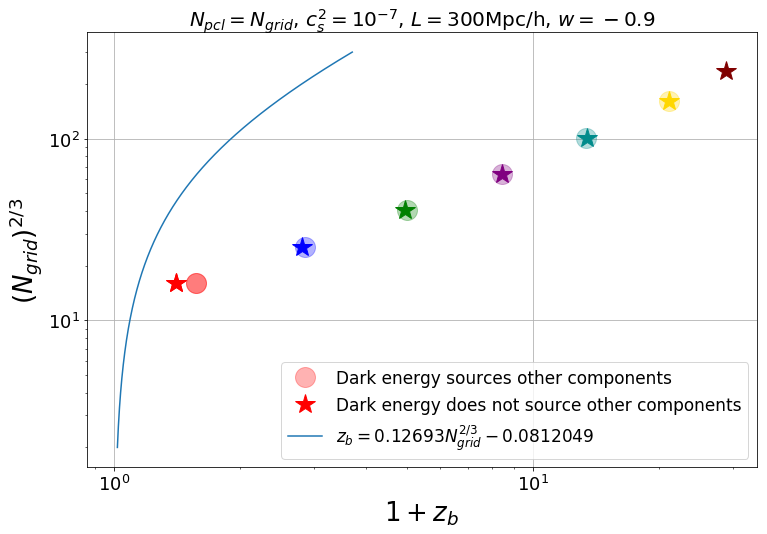

In [116]:
# data= [r"$64^3$",r"$128^3$",r"$256^3$",r"$512^3$",r"$1024^3$"]
# Ngrid_solo = [64**3,128**3,256**3,512**3,1024**3,2048**3]
# Ngrid_full = [64**3,128**3,256**3,512**3,1024**3]
Ngrid_solo = [64,128,256,512,1024,2048,3600]
Ngrid_full = [64,128,256,512,1024,2048]
plt.figure(figsize=(12,8))

mm=2./3.
for i in range(6):
    if (i==0):
        x = 1./(kess_nl_source[i][-1:,2])
        y = Ngrid_full[i]**(mm)
        plt.plot( x,y,"o",markersize=20,alpha =0.3,color=ColorsI[i],label = "Dark energy sources other components")

#     plt.semilogy(1./(kess_nl[i][:,2]) -1.,np.abs(kess_nl[i][:,3]),"o",lw=3,color=ColorsI[i],label=r""+data[i])
    y = Ngrid_full[i]**(mm)
    x = 1./(kess_nl_source[i][-1:,2])
    plt.plot(x,y ,"o",markersize=20,alpha =0.3,color=ColorsI[i])
for i in range(7):
    if (i==0):
        y = Ngrid_solo[i]**(mm)
        x = 1./(kess_nl[i][-1:,2])
        plt.plot(x,y ,"*",markersize=20,alpha =1,color=ColorsI[i],label = "Dark energy does not source other components")
#     plt.semilogy(1./(kess_nl[i][:,2]) -1.,np.abs(kess_nl[i][:,3]),"o",lw=3,color=ColorsI[i],label=r""+data[i])
    x = 1./(kess_nl[i][-1:,2])
    y = Ngrid_solo[i]**(mm)
    plt.plot(x,y ,"*",markersize=20,alpha =1,color=ColorsI[i])
#     plt.legend()
z = np.arange(2,300,0.1)

plt.plot (z * best_vals[0] + best_vals[1],z  ,markersize=20, label = r"$z_b = 0.12693 N_{grid}^{2/3}  -0.0812049 $" )
# #     plt.ylim(1.e-8,1.e-2)
plt.xlabel("$1+z_b$",fontsize=26)
plt.title(r"$N_{pcl} = N_{grid}$, $c_s^2=10^{-7}$, $L = 300$Mpc/h, $w=-0.9$", fontsize=20)
plt.ylabel(r"$({N_{grid}})^{2/3}$",fontsize=26)
# plt.ylim(1.e-15,1.e-1)
# plt.yticks([64,128,256])

plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=17)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.tick_params(axis = 'both', which = 'minor', labelsize = 18)
plt.grid(True)

# plt.savefig("spatial_resolution_v3.pdf")

plt.show()

## Fit to Log(Ngrid)

In [166]:
data = np.zeros((7,2))
for i in range(7):
    data[i,0] = Ngrid_solo[i]; 
    data[i,1] = 1./(kess_nl[i][-1:,2])-1

from scipy.optimize import curve_fit
def func(x, alpha, beta):
    return alpha *x  +beta
x = np.log(data[:,0])
y = np.log(1+data[:,1])
init_vals = [1, 1]  
best_vals_whole, covar = curve_fit(func, x, y, p0=init_vals)

num=4
x = np.log(data[num:,0])
print(data[num:,1])
y = np.log(1+data[num:,1])
init_vals = [1, 1]  
best_vals_matter, covar = curve_fit(func, x, y, p0=init_vals)

[ 12.44145641  20.12659691  27.93711098]


In [167]:
best_vals_matter[0]

0.61150042905411761

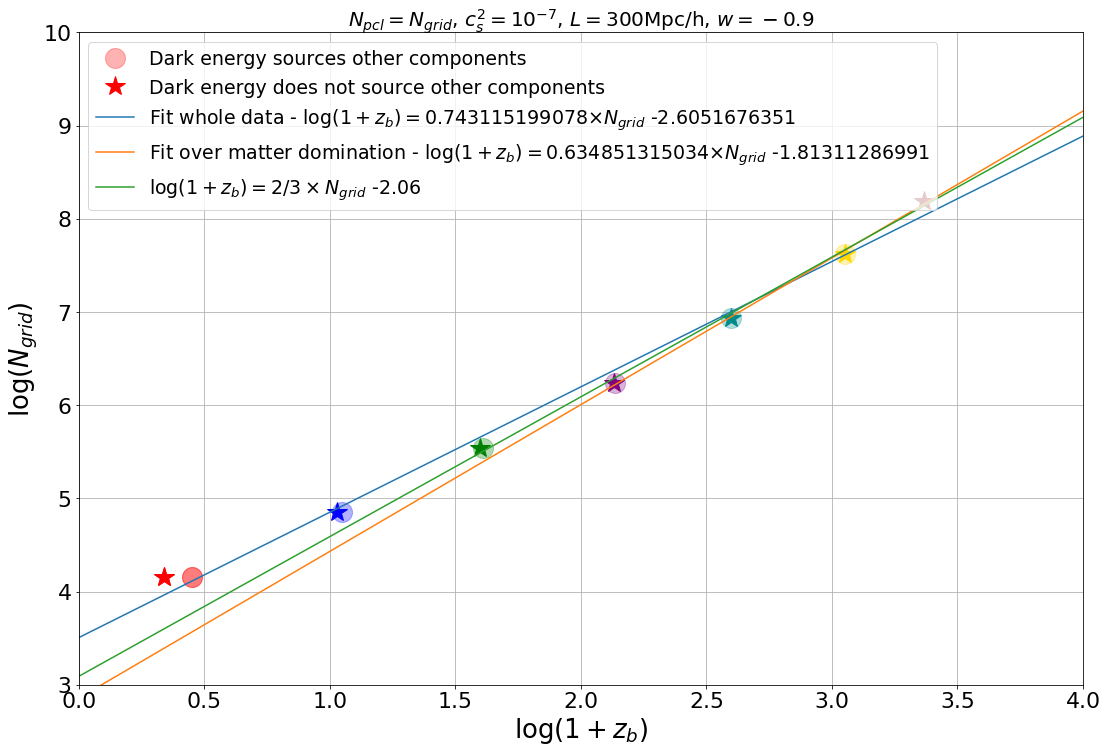

In [165]:
### data= [r"$64^3$",r"$128^3$",r"$256^3$",r"$512^3$",r"$1024^3$"]
# Ngrid_solo = [64**3,128**3,256**3,512**3,1024**3,2048**3]
# Ngrid_full = [64**3,128**3,256**3,512**3,1024**3]
Ngrid_solo = [64,128,256,512,1024,2048,3600]
Ngrid_full = [64,128,256,512,1024,2048]
plt.figure(figsize=(18,12))

mm=3./3.
for i in range(6):
    if (i==0):
        x = 1./(kess_nl_source[i][-1:,2])
        y = Ngrid_full[i]**(mm)
        plt.plot( np.log(x) ,np.log(y),"o",markersize=20,alpha =0.3,color=ColorsI[i],label = "Dark energy sources other components")

#     plt.semilogy(1./(kess_nl[i][:,2]) -1.,np.abs(kess_nl[i][:,3]),"o",lw=3,color=ColorsI[i],label=r""+data[i])
    y = Ngrid_full[i]**(mm)
    x = 1./(kess_nl_source[i][-1:,2])
    plt.plot(np.log(x) ,np.log(y),"o",markersize=20,alpha =0.3,color=ColorsI[i])
for i in range(7):
    if (i==0):
        y = Ngrid_solo[i]**(mm) # Ngrid
        x = 1./(kess_nl[i][-1:,2]) # 1+z
        plt.plot(np.log(x) ,np.log(y) ,"*",markersize=20,alpha =1,color=ColorsI[i],label = "Dark energy does not source other components")
#     plt.semilogy(1./(kess_nl[i][:,2]) -1.,np.abs(kess_nl[i][:,3]),"o",lw=3,color=ColorsI[i],label=r""+data[i])
    x = 1./(kess_nl[i][-1:,2])
    y = Ngrid_solo[i]**(mm)
    plt.plot(np.log(x) ,np.log(y) ,"*",markersize=20,alpha =1,color=ColorsI[i])
#     plt.legend()
data_range = np.arange(2.6,10,0.1)

## TESTS:

plt.plot (data_range * best_vals_whole[0] + best_vals_whole[1],data_range  ,"-",markersize=20, label = r"Fit whole data - $\log(1 + z_b) = $"+ str(best_vals_whole[0]) +r"$\times N_{grid}$"+" "+str(best_vals_whole[1]))
plt.plot (data_range * best_vals_matter[0] + best_vals_matter[1],data_range  ,"-",markersize=20, label = r"Fit over matter domination - $\log(1 + z_b) = $"+ str(best_vals_matter[0]) +r"$\times N_{grid}$"+" "+str(best_vals_matter[1]))
# plt.plot (data_range *1 -4.7088177251837395,data_range, "-", markersize=20, label = r"$\log(1 + z_b) = $"+ str(1.) +r"$\times N_{grid}$"+" "+str(-3.5))
plt.plot (data_range *(2./3.) -2.06,data_range, "-" ,markersize=20, label = r"$\log(1 + z_b) = $"+r"$2/3 \times N_{grid}$"+" "+str(-2.06))

# #     plt.ylim(1.e-8,1.e-2)
plt.xlabel("$\log(1+z_b)$",fontsize=26)
plt.title(r"$N_{pcl} = N_{grid}$, $c_s^2=10^{-7}$, $L = 300$Mpc/h, $w=-0.9$", fontsize=20)
plt.ylabel(r"$\log({N_{grid}})$",fontsize=26)
# plt.ylim(1.e-15,1.e-1)
# plt.yticks([64,128,256])
plt.ylim(3,10)
plt.xlim(0,4)
# plt.yscale('log')
# plt.xscale('log')
plt.legend(fontsize=19)
plt.tick_params(axis = 'both', which = 'major', labelsize = 22)
plt.tick_params(axis = 'both', which = 'minor', labelsize = 22)
plt.grid(True)

# plt.savefig("spatial_resolution_v3.pdf")

plt.show()

# Converting z to tau

In [168]:
class_file = np.loadtxt("./CLASS_lcdm/lcdm_background.dat");
